# Load Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import joblib
from scipy.stats import skew, kurtosis

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [ ]:
# Define the path to your raw data
data_path = '../data/raw/diabetes.csv'
df = pd.read_csv(data_path)

# Descriptive Statistics

In [4]:
# View dataset information,first few rows and descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Initial Data Quality Check

In [7]:
# Check for explicit missing values (NaNs)
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# The Pima dataset often has 0s representing missing values in certain columns.
# Let's identify these and count them.
# Columns where 0 is not a valid value: Glucose, BloodPressure, SkinThickness, Insulin, BMI
cols_with_zeros_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n--- Count of 0s (potential missing values) in specific columns ---")
for col in cols_with_zeros_as_missing:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count}")



--- Count of 0s (potential missing values) in specific columns ---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


# Exploratory Data Analysis (EDA)

## Target Variable Distribution

In [9]:
# Analyze the distribution of the 'Outcome' variable (0: Non-diabetic, 1: Diabetic)
print("\n--- Distribution of Outcome variable ---")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)


--- Distribution of Outcome variable ---
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


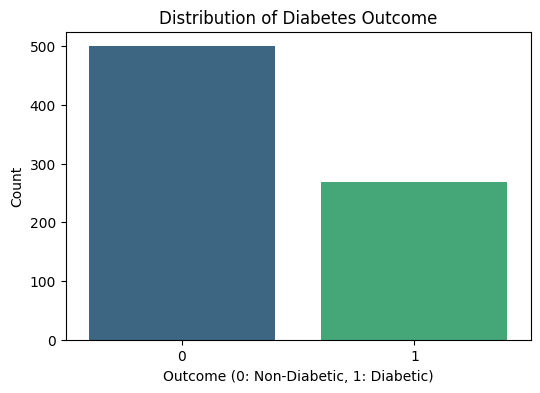

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

## Feature Distributions (Histograms/KDE plots)

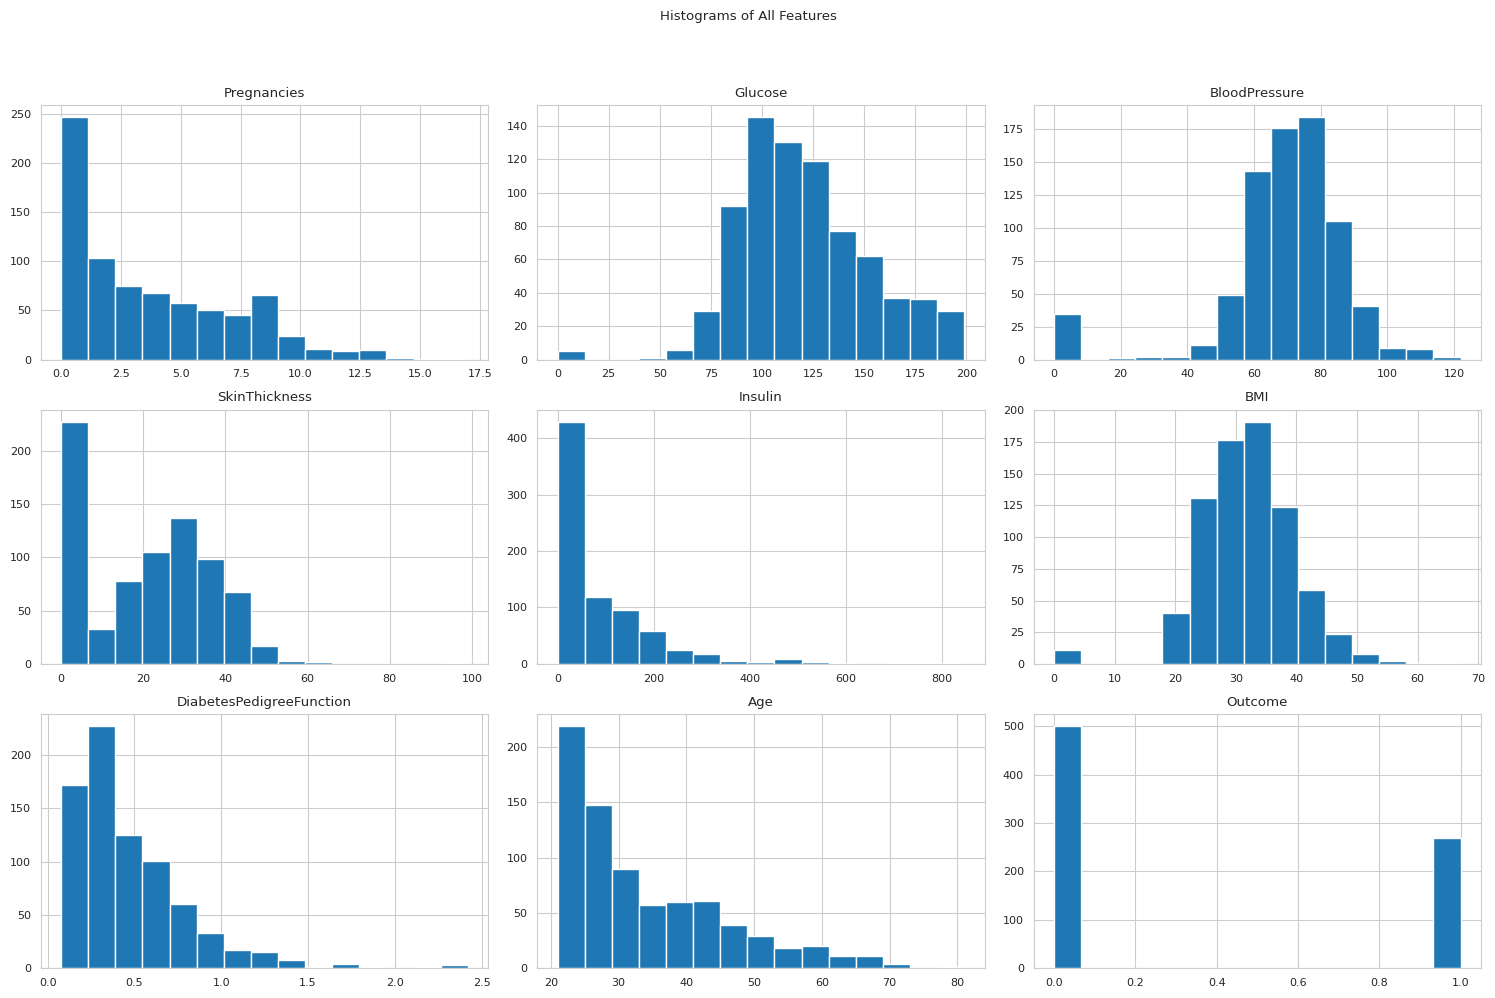

In [30]:
# Plot histograms for all numerical features to see their distributions
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

## Box Plots

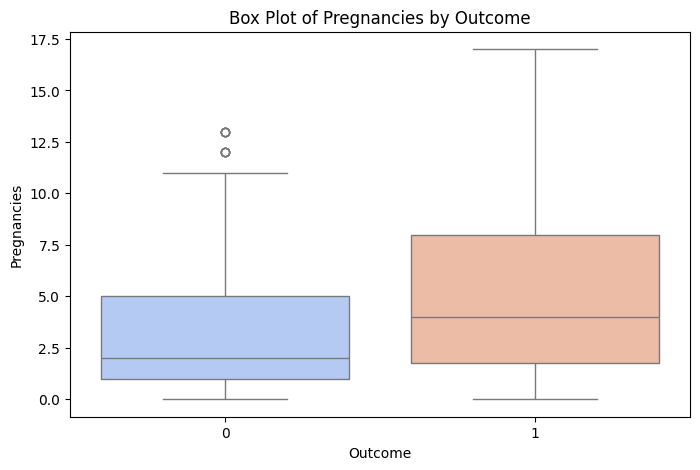

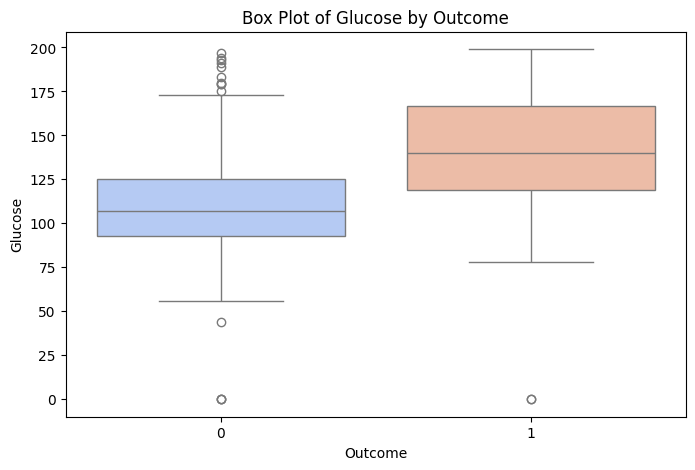

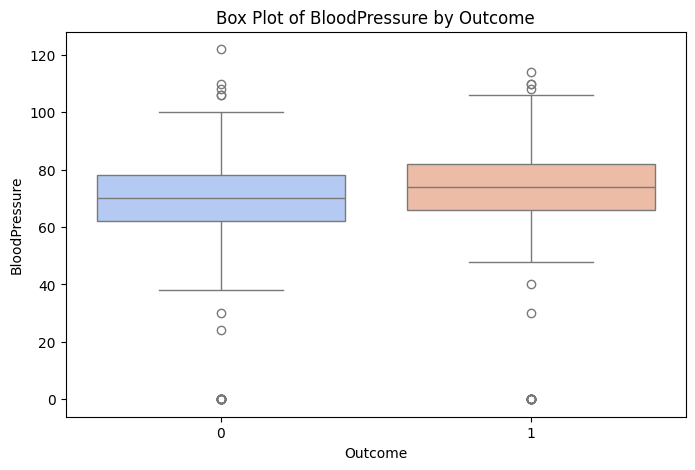

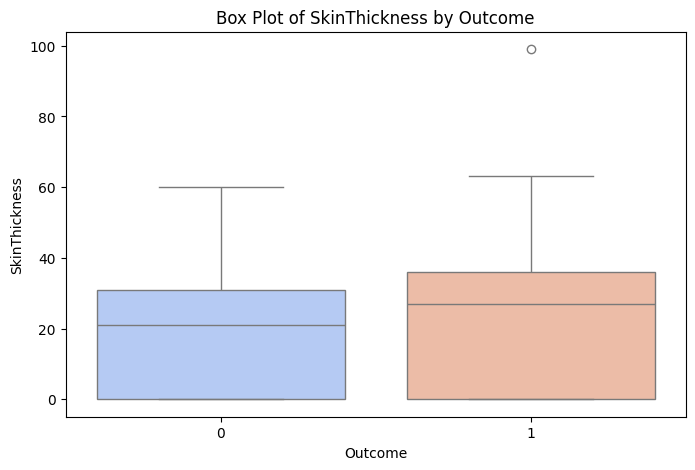

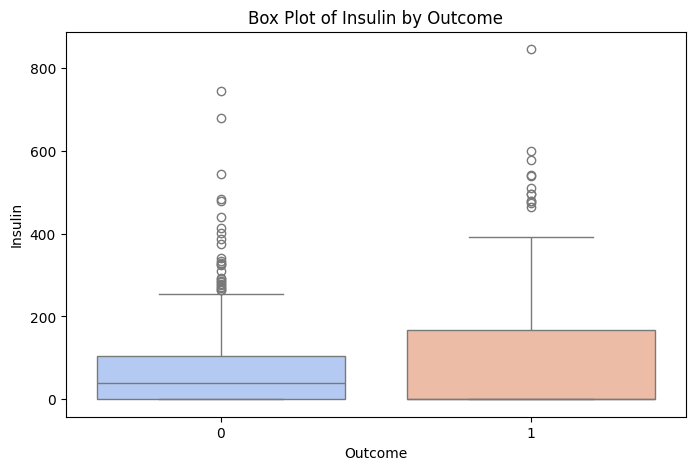

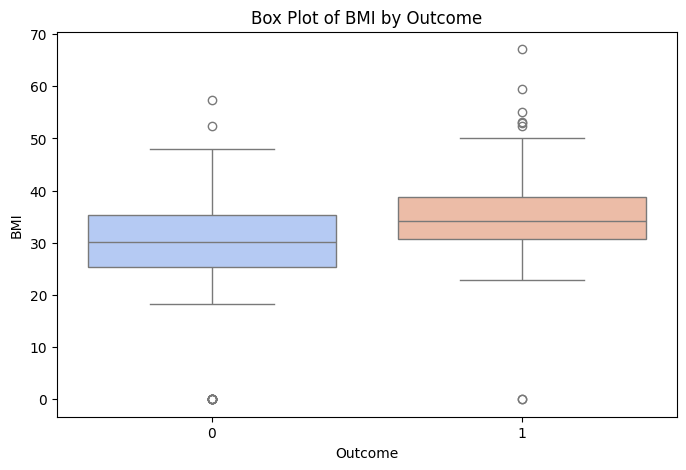

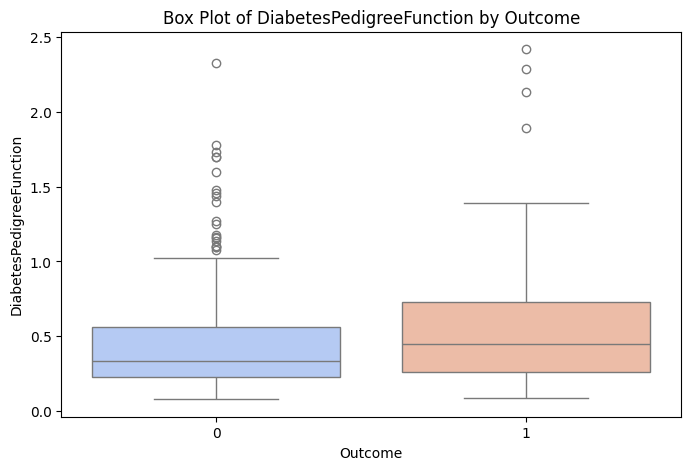

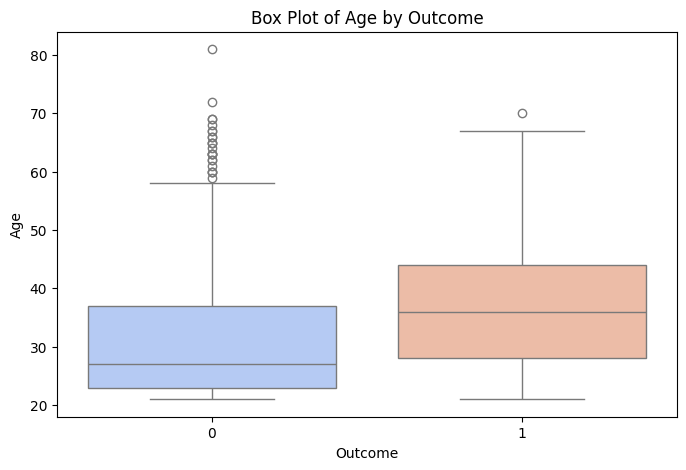

In [12]:
# Box Plots to Identify Outliers and Compare by Outcome
for col in df.columns[:-1]: # Exclude 'Outcome'
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Outcome', y=col, data=df, palette='coolwarm')
    plt.title(f'Box Plot of {col} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.show()

## Skewness and Kurtosis (Quantitative Measures)

In [13]:
print("\n--- Skewness of Features ---")
print(df.skew())

print("\n--- Kurtosis of Features ---")
print(df.kurt())


--- Skewness of Features ---
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

--- Kurtosis of Features ---
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


## Correlation Matrix

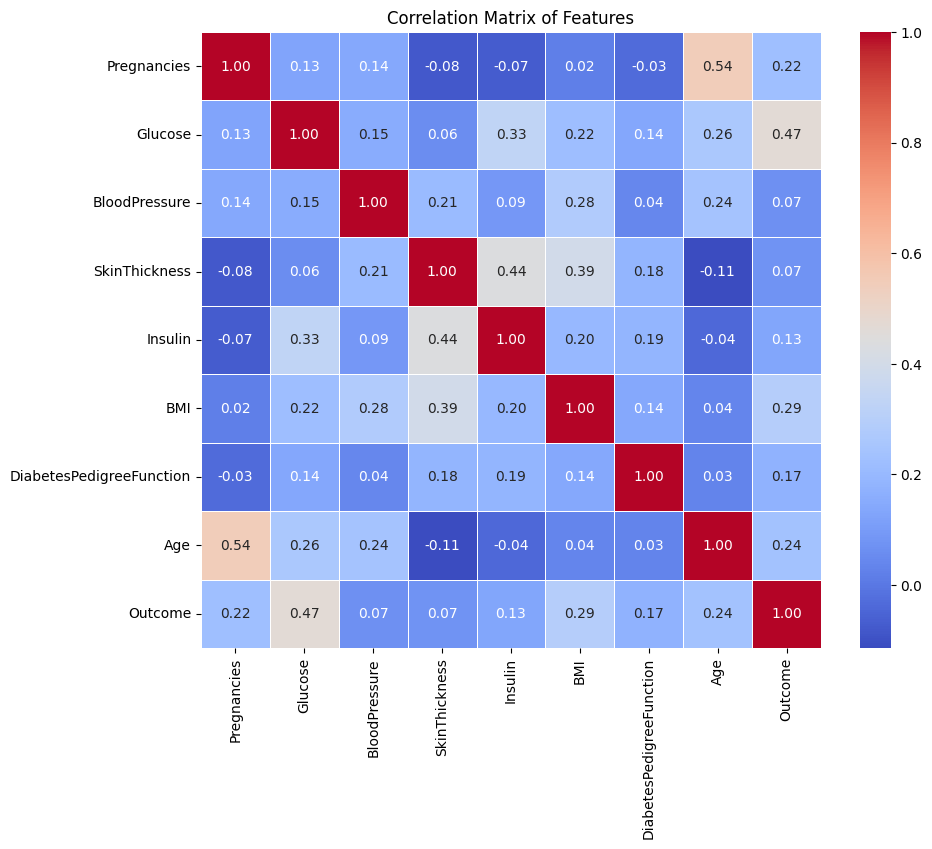

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Quantitative Outlier Detection (IQR Method)

In [15]:
print("\n--- Outlier Counts (IQR Method) ---")
for col in df.columns[:-1]: # Exclude 'Outcome'
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # For columns where 0 is treated as missing, exclude 0s from outlier calculation
    if col in cols_with_zeros_as_missing:
        temp_col = df[df[col] != 0][col]
        outliers = temp_col[(temp_col < lower_bound) | (temp_col > upper_bound)]
    else:
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Feature: {col}")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of Outliers: {len(outliers)}")
    print("-" * 30)


--- Outlier Counts (IQR Method) ---
Feature: Pregnancies
  Q1: 1.00, Q3: 6.00, IQR: 5.00
  Lower Bound: -6.50, Upper Bound: 13.50
  Number of Outliers: 4
------------------------------
Feature: Glucose
  Q1: 99.00, Q3: 140.25, IQR: 41.25
  Lower Bound: 37.12, Upper Bound: 202.12
  Number of Outliers: 0
------------------------------
Feature: BloodPressure
  Q1: 62.00, Q3: 80.00, IQR: 18.00
  Lower Bound: 35.00, Upper Bound: 107.00
  Number of Outliers: 10
------------------------------
Feature: SkinThickness
  Q1: 0.00, Q3: 32.00, IQR: 32.00
  Lower Bound: -48.00, Upper Bound: 80.00
  Number of Outliers: 1
------------------------------
Feature: Insulin
  Q1: 0.00, Q3: 127.25, IQR: 127.25
  Lower Bound: -190.88, Upper Bound: 318.12
  Number of Outliers: 34
------------------------------
Feature: BMI
  Q1: 27.30, Q3: 36.60, IQR: 9.30
  Lower Bound: 13.35, Upper Bound: 50.55
  Number of Outliers: 8
------------------------------
Feature: DiabetesPedigreeFunction
  Q1: 0.24, Q3: 0.63, IQ

# Statistical Tests

## T-tests

In [22]:
# T-tests for numerical features vs. Outcome (for normally distributed data or large samples)
# We can use independent t-tests to compare means of numerical features between the two outcome groups.
# First, separate the data by outcome
df_diabetic = df[df['Outcome'] == 1]
df_non_diabetic = df[df['Outcome'] == 0]

print("\n--- T-tests (Independent Samples) for Numerical Features vs. Outcome ---")
for col in df.columns[:-1]: # Exclude 'Outcome'
    # Perform independent t-test
    stat, p_value = stats.ttest_ind(df_diabetic[col], df_non_diabetic[col], equal_var=False, nan_policy='omit')
    print(f"Feature: {col}")
    print(f"  T-statistic: {stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f"  -> Significant difference (p < 0.05)")
    else:
        print(f"  -> No significant difference (p >= 0.05)")
    print("-" * 30)


--- T-tests (Independent Samples) for Numerical Features vs. Outcome ---
Feature: Pregnancies
  T-statistic: 5.907, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: Glucose
  T-statistic: 13.752, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: BloodPressure
  T-statistic: 1.713, P-value: 0.087
  -> No significant difference (p >= 0.05)
------------------------------
Feature: SkinThickness
  T-statistic: 1.971, P-value: 0.049
  -> Significant difference (p < 0.05)
------------------------------
Feature: Insulin
  T-statistic: 3.301, P-value: 0.001
  -> Significant difference (p < 0.05)
------------------------------
Feature: BMI
  T-statistic: 8.619, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: DiabetesPedigreeFunction
  T-statistic: 4.577, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: Age
  T-statist

## Shapiro-Wilk Test for Normality

In [23]:
# This test checks if a sample comes from a normal distribution.
# A low p-value (e.g., < 0.05) suggests that the data is NOT normally distributed.
print("\n--- Shapiro-Wilk Test for Normality ---")
for col in df.columns[:-1]: # Exclude 'Outcome'
    # Filter out 0s for relevant columns before testing normality, as 0s are not true values
    if col in cols_with_zeros_as_missing:
        data_for_test = df[df[col] != 0][col].dropna()
    else:
        data_for_test = df[col].dropna() # Use dropna() in case of any NaNs introduced earlier

    if len(data_for_test) > 5000: # Shapiro-Wilk is computationally intensive for very large samples
        print(f"Skipping Shapiro-Wilk for {col} (too many samples). Consider visual inspection or other tests.")
        continue
    if len(data_for_test) < 3: # Need at least 3 samples for Shapiro-Wilk
        print(f"Not enough data for Shapiro-Wilk for {col}.")
        continue

    stat, p_value = stats.shapiro(data_for_test)
    print(f"Feature: {col}")
    print(f"  Shapiro-Wilk Statistic: {stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f"  -> Distribution is NOT normal (p < 0.05)")
    else:
        print(f"  -> Distribution IS normal (p >= 0.05)")
    print("-" * 30)


--- Shapiro-Wilk Test for Normality ---
Feature: Pregnancies
  Shapiro-Wilk Statistic: 0.904, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: Glucose
  Shapiro-Wilk Statistic: 0.970, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: BloodPressure
  Shapiro-Wilk Statistic: 0.990, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: SkinThickness
  Shapiro-Wilk Statistic: 0.968, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: Insulin
  Shapiro-Wilk Statistic: 0.804, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: BMI
  Shapiro-Wilk Statistic: 0.980, P-value: 0.000
  -> Distribution is NOT normal (p < 0.05)
------------------------------
Feature: DiabetesPedigreeFunction
  Shapiro-Wilk Statistic: 0.837, P-value: 0.000
  -> Distribution is NOT normal

## Mann-Whitney U Test (Non-parametric alternative to t-test)

In [24]:
# This is more robust for non-normally distributed data or data with outliers.
print("\n--- Mann-Whitney U Test (Non-parametric) for Numerical Features vs. Outcome ---")
for col in df.columns[:-1]: # Exclude 'Outcome'
    # Filter out 0s for relevant columns before testing
    if col in cols_with_zeros_as_missing:
        group1 = df_diabetic[df_diabetic[col] != 0][col].dropna()
        group0 = df_non_diabetic[df_non_diabetic[col] != 0][col].dropna()
    else:
        group1 = df_diabetic[col].dropna()
        group0 = df_non_diabetic[col].dropna()

    if len(group1) == 0 or len(group0) == 0:
        print(f"Not enough data in one or both groups for Mann-Whitney U for {col}.")
        continue

    stat, p_value = stats.mannwhitneyu(group1, group0, alternative='two-sided')
    print(f"Feature: {col}")
    print(f"  Mann-Whitney U Statistic: {stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f"  -> Significant difference (p < 0.05)")
    else:
        print(f"  -> No significant difference (p >= 0.05)")
    print("-" * 30)


--- Mann-Whitney U Test (Non-parametric) for Numerical Features vs. Outcome ---
Feature: Pregnancies
  Mann-Whitney U Statistic: 83015.000, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: Glucose
  Mann-Whitney U Statistic: 104808.500, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: BloodPressure
  Mann-Whitney U Statistic: 73645.500, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: SkinThickness
  Mann-Whitney U Statistic: 43050.000, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: Insulin
  Mann-Whitney U Statistic: 25109.500, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: BMI
  Mann-Whitney U Statistic: 89731.000, P-value: 0.000
  -> Significant difference (p < 0.05)
------------------------------
Feature: DiabetesPedigreeFunction
  Mann-Whitney U Statistic

# EDA after Preprocessing Steps (Imputation, Transformation and Scaling)

## EDA of Imputed Dataset

Imputed df skewness - to check righlty skewed columns after imputing 0's
Pregnancies                 0.901674
Glucose                     0.535587
BloodPressure               0.141885
SkinThickness               0.837608
Insulin                     3.380019
BMI                         0.599233
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64
Imputed df kurtosis - to check righlty skewed columns with extreme outliers after imputing 0's
Pregnancies                  0.159220
Glucose                     -0.257847
BloodPressure                1.098239
SkinThickness                5.430987
Insulin                     16.232455
BMI                          0.920222
DiabetesPedigreeFunction     5.594954
Age                          0.643159
Outcome                     -1.600930
dtype: float64


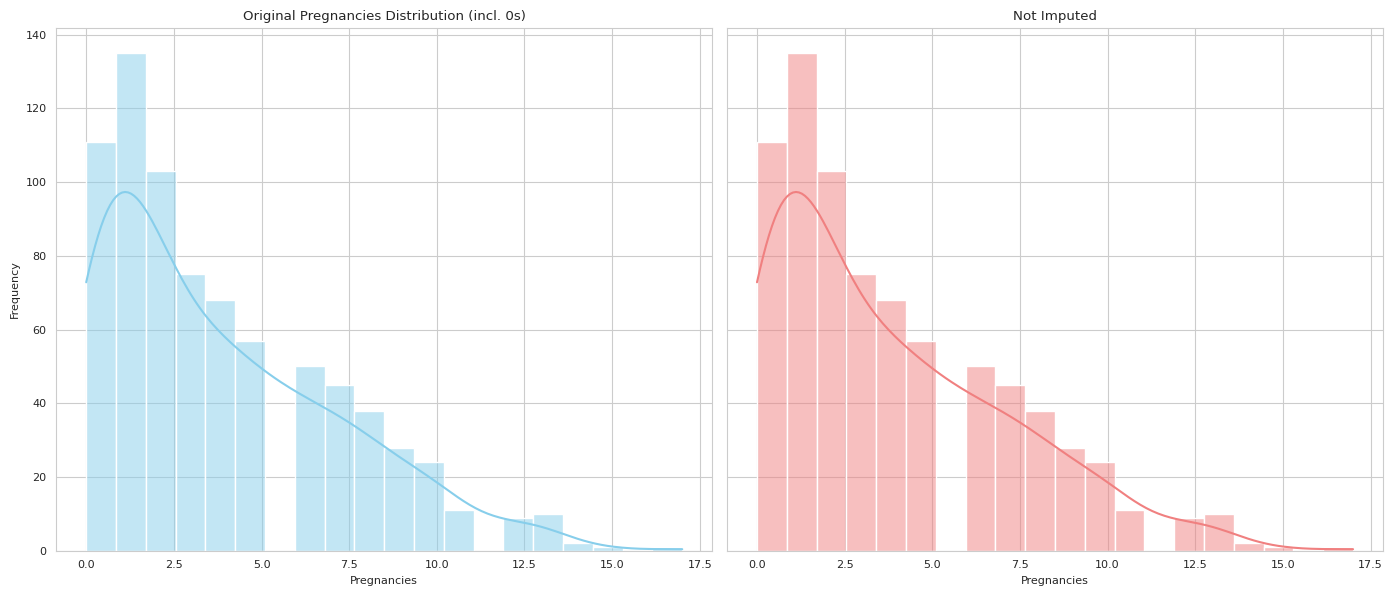

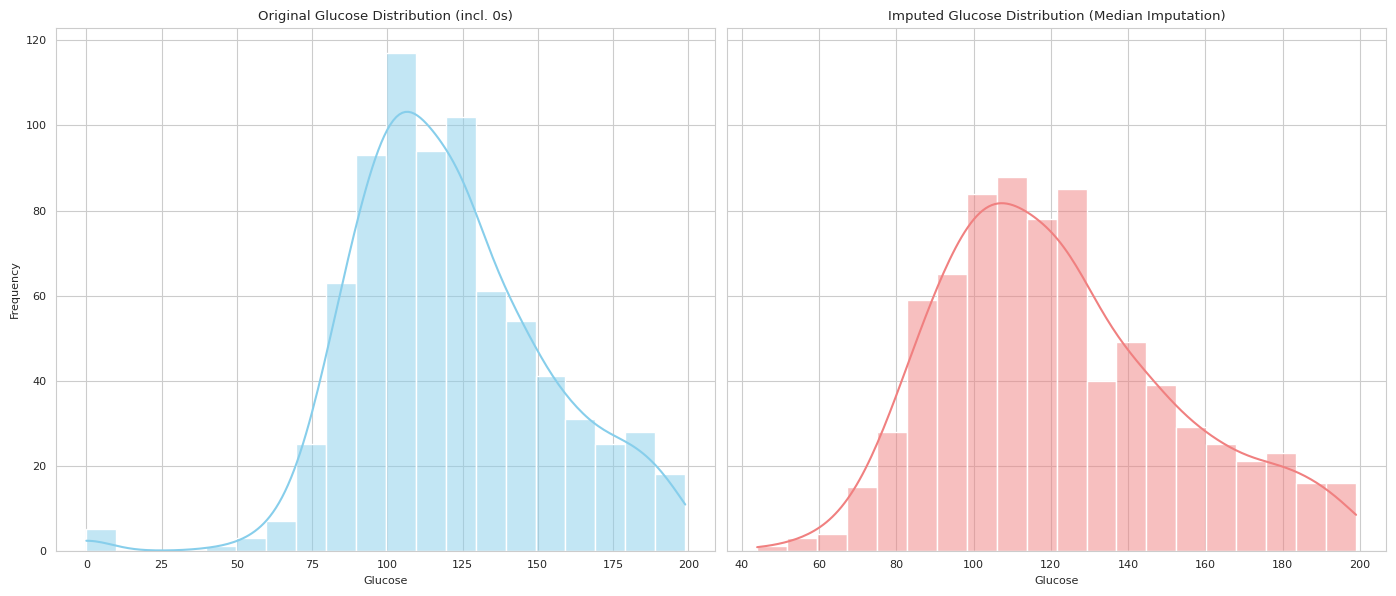

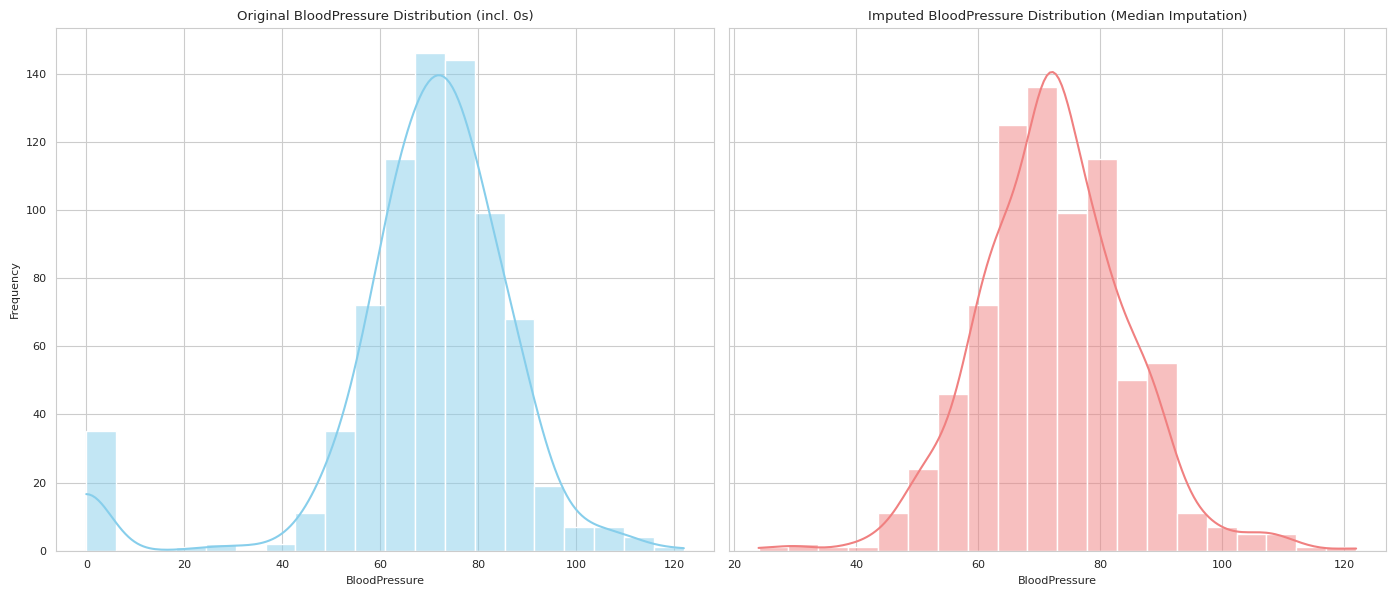

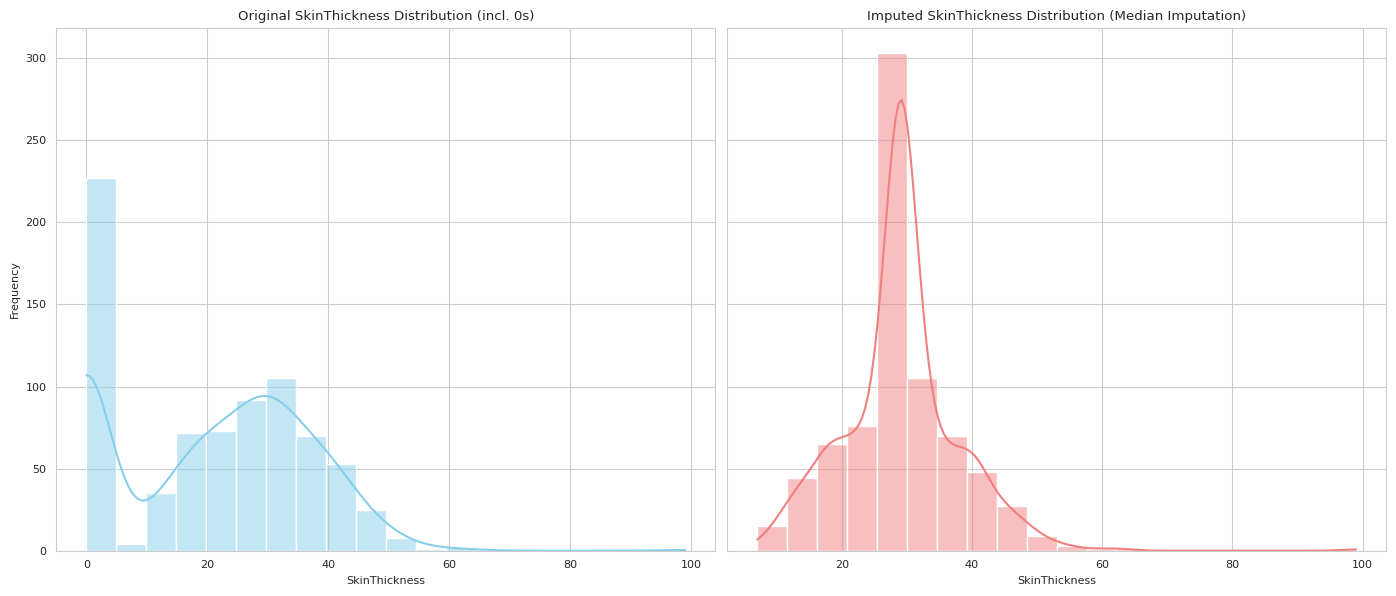

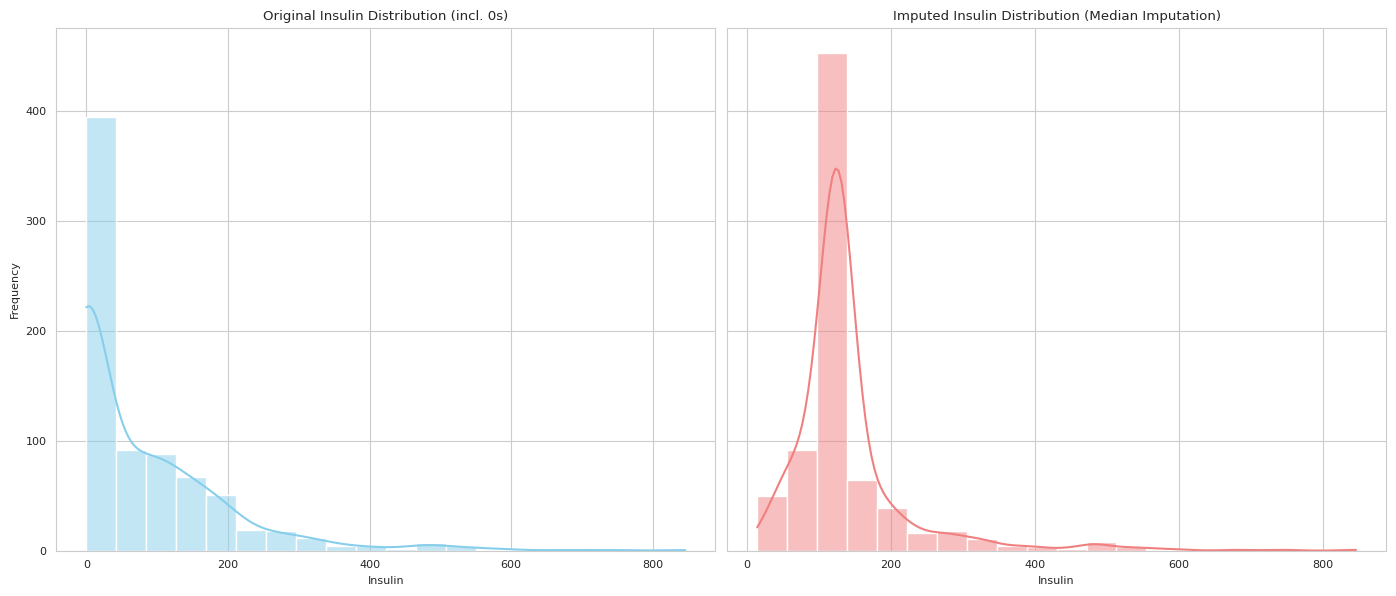

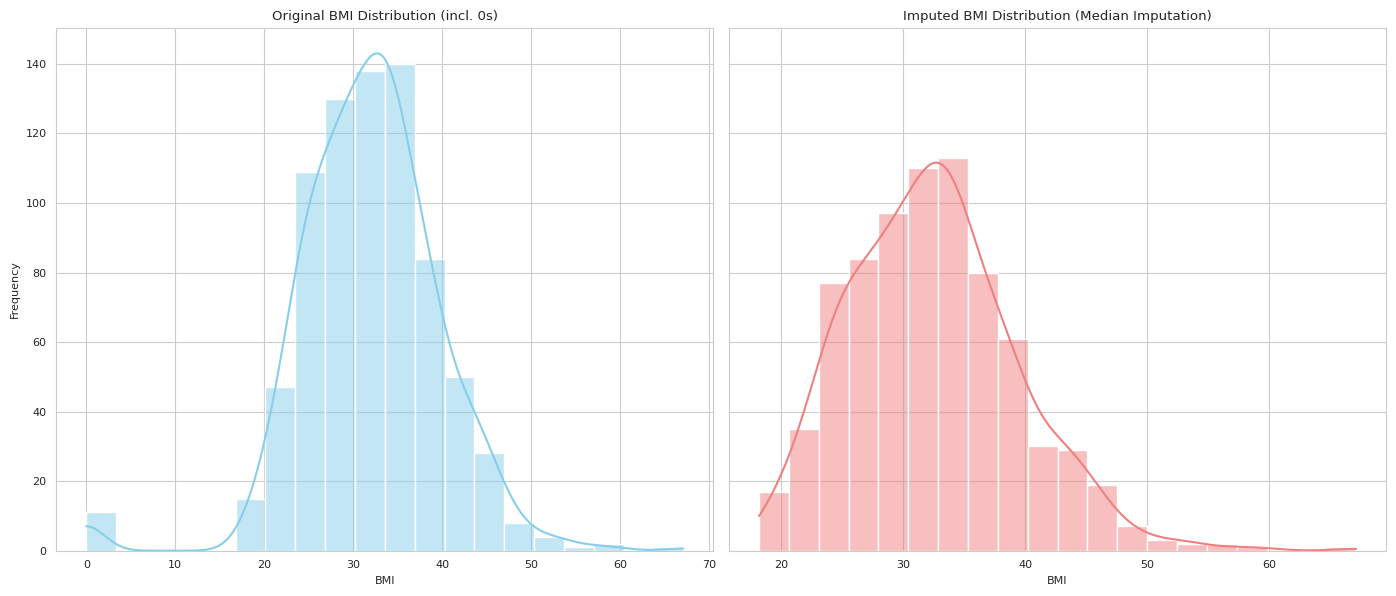

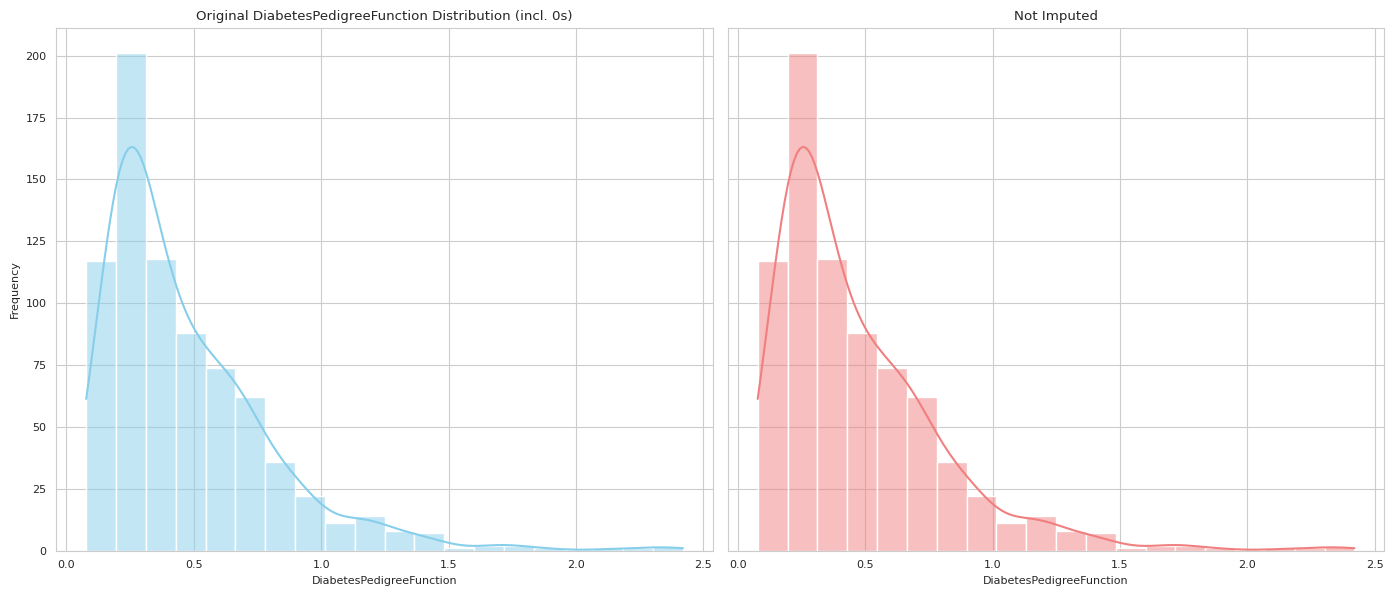

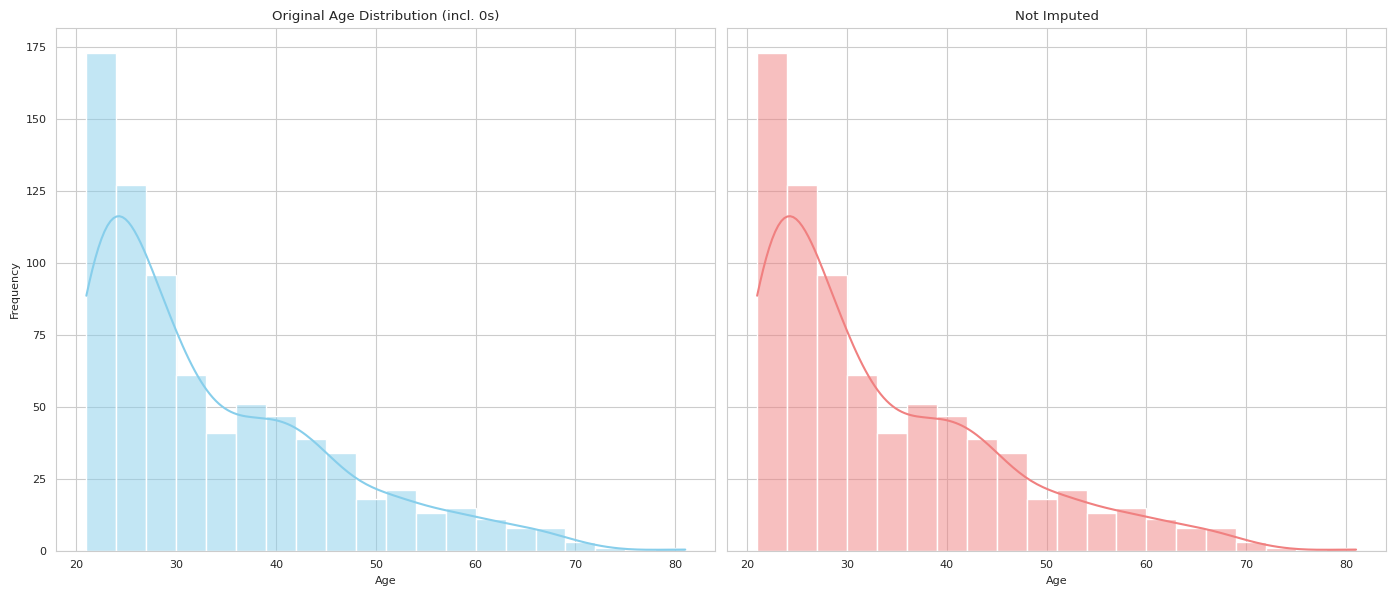

In [ ]:
imputed_data_path = '../data/processed/diabetes_imputed.csv'
imputed_df = pd.read_csv(imputed_data_path)

print("Imputed df skewness - to check righlty skewed columns after imputing 0's")
print(imputed_df.skew())
print("Imputed df kurtosis - to check righlty skewed columns with extreme outliers after imputing 0's")
print(imputed_df.kurt())

df_org = pd.read_csv(data_path)

for col in df_org.columns:
  if col == 'Outcome':
    continue

  fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey ensures same y-axis scale

  # Plot Original Distribution
  sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue', bins=20)
  axes[0].set_title(f'Original {col} Distribution (incl. 0s)')
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Frequency')

  # Plot Imputed Distribution
  sns.histplot(imputed_df[col], kde=True, ax=axes[1], color='lightcoral', bins=20)
  if col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    axes[1].set_title(f'Imputed {col} Distribution (Median Imputation)')
  else:
    axes[1].set_title(f'Not Imputed')
  axes[1].set_xlabel(col)
  axes[1].set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()

## EDA of Transformed Dataset

Transformed df skewness - to check righlty skewed columns after log1p transformation
Pregnancies                -0.243478
Glucose                    -0.058322
BloodPressure               0.141885
SkinThickness              -0.859016
Insulin                    -0.175078
BMI                        -0.037722
DiabetesPedigreeFunction    1.117942
Age                         0.614664
Outcome                     0.635017
dtype: float64
Transformed df kurtosis - to check righlty skewed columns with extreme outliers after log1p transformation
Pregnancies                -0.947674
Glucose                    -0.168177
BloodPressure               1.098239
SkinThickness               1.789132
Insulin                     3.309865
BMI                        -0.087581
DiabetesPedigreeFunction    1.391303
Age                        -0.645917
Outcome                    -1.600930
dtype: float64


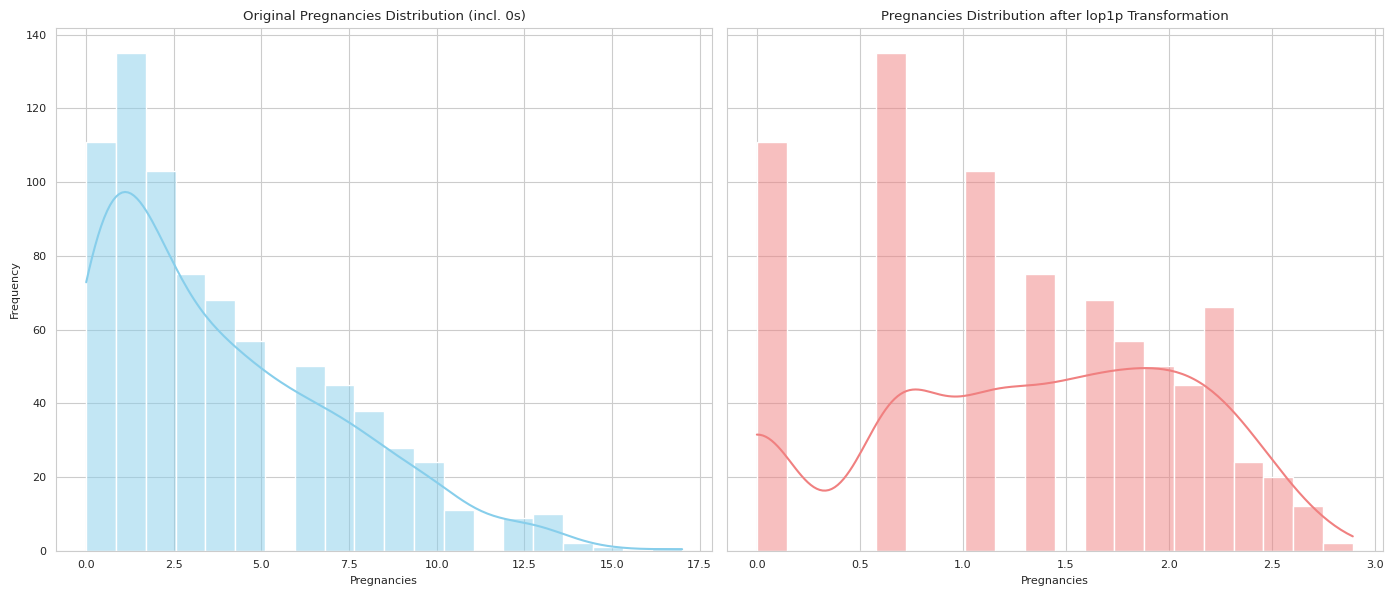

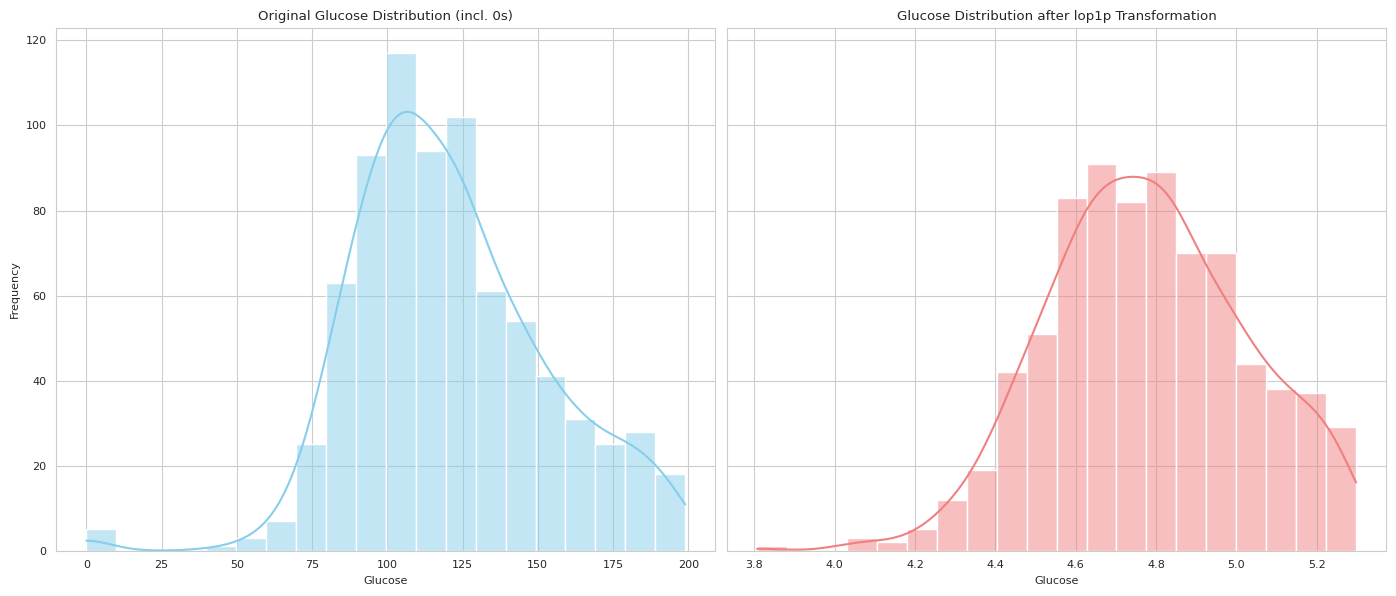

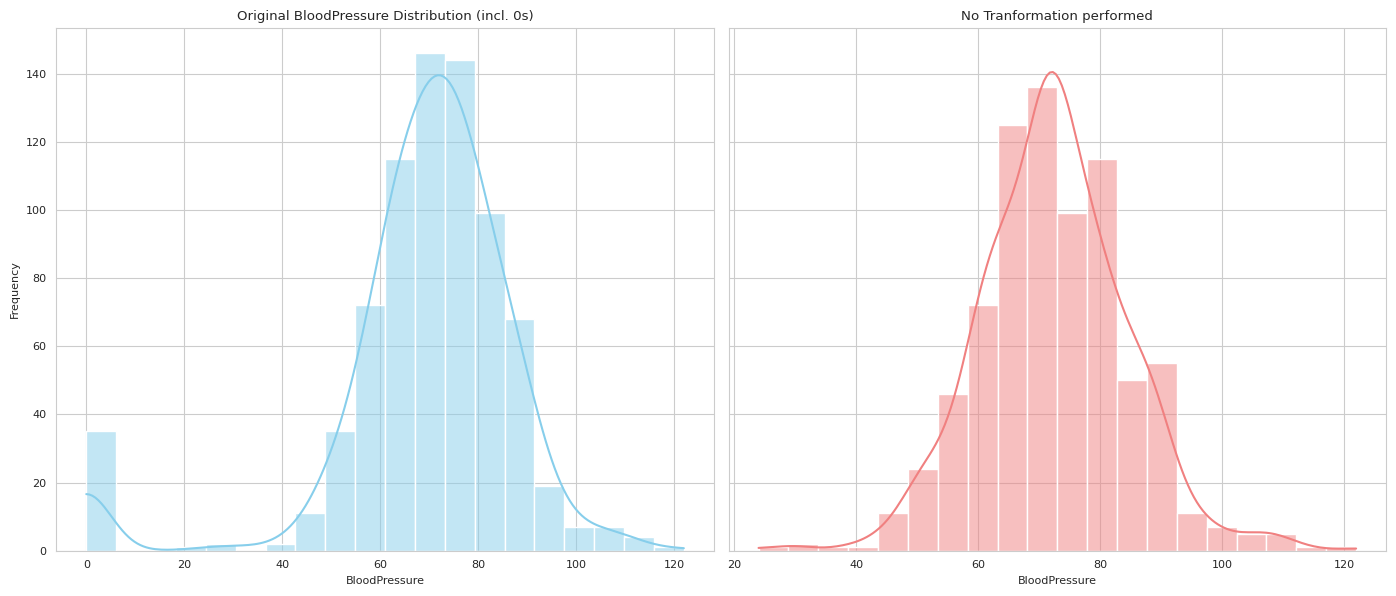

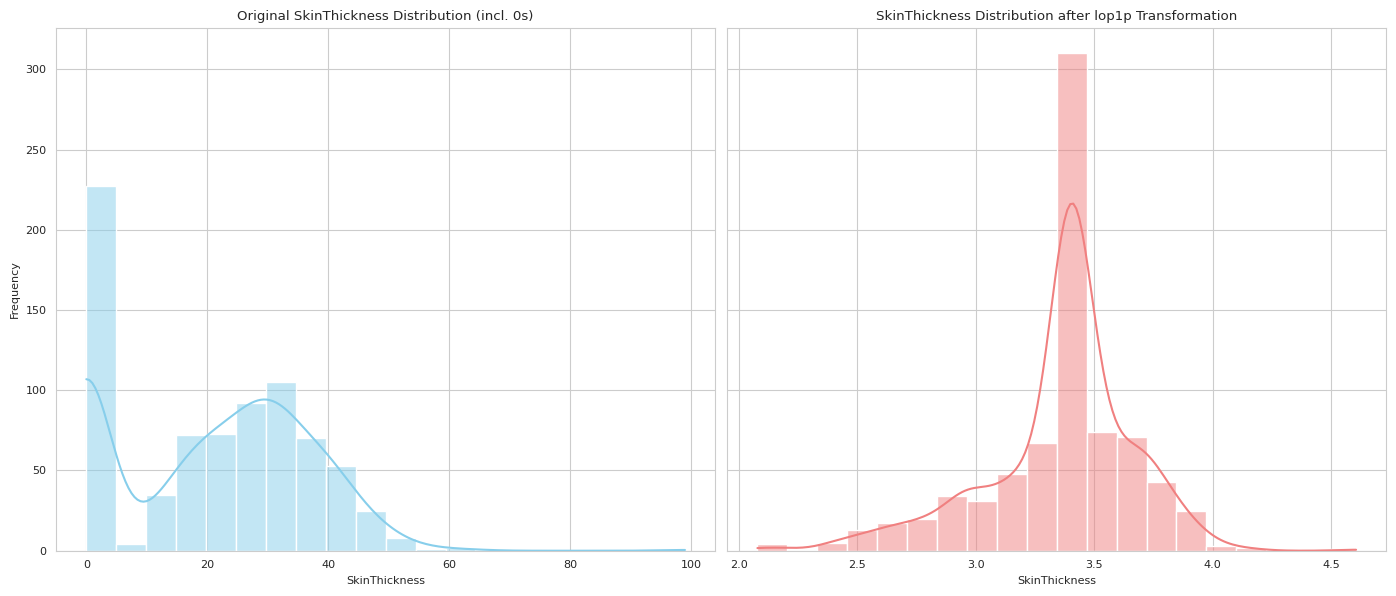

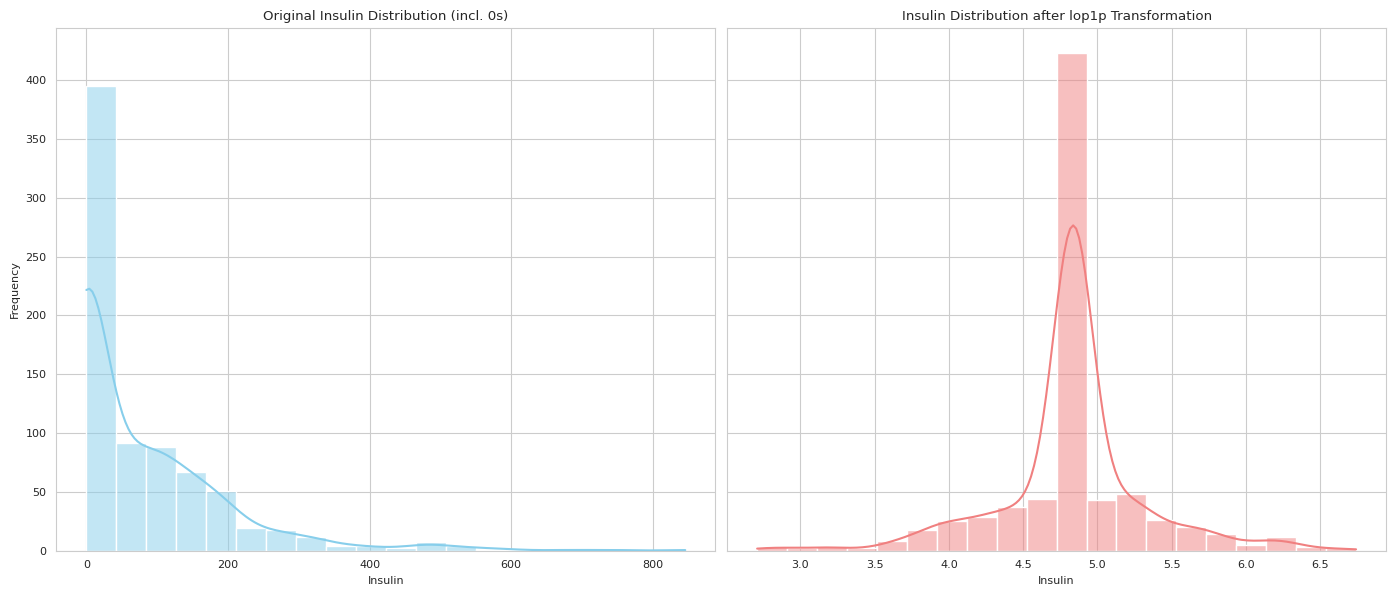

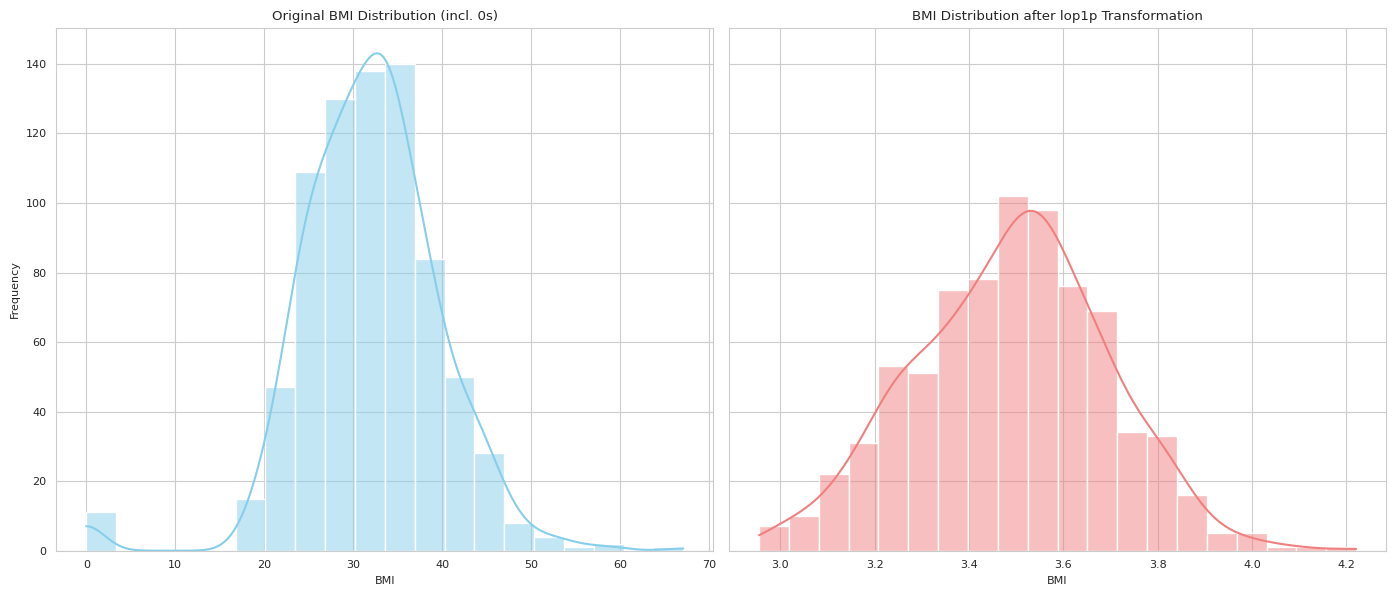

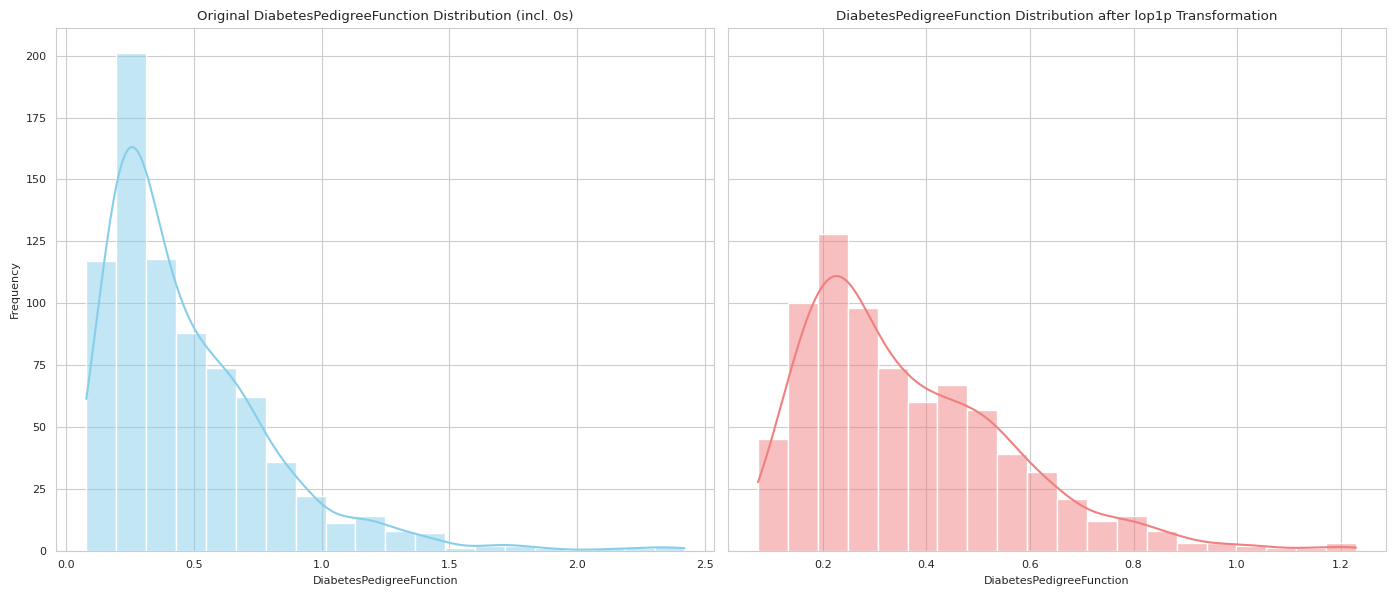

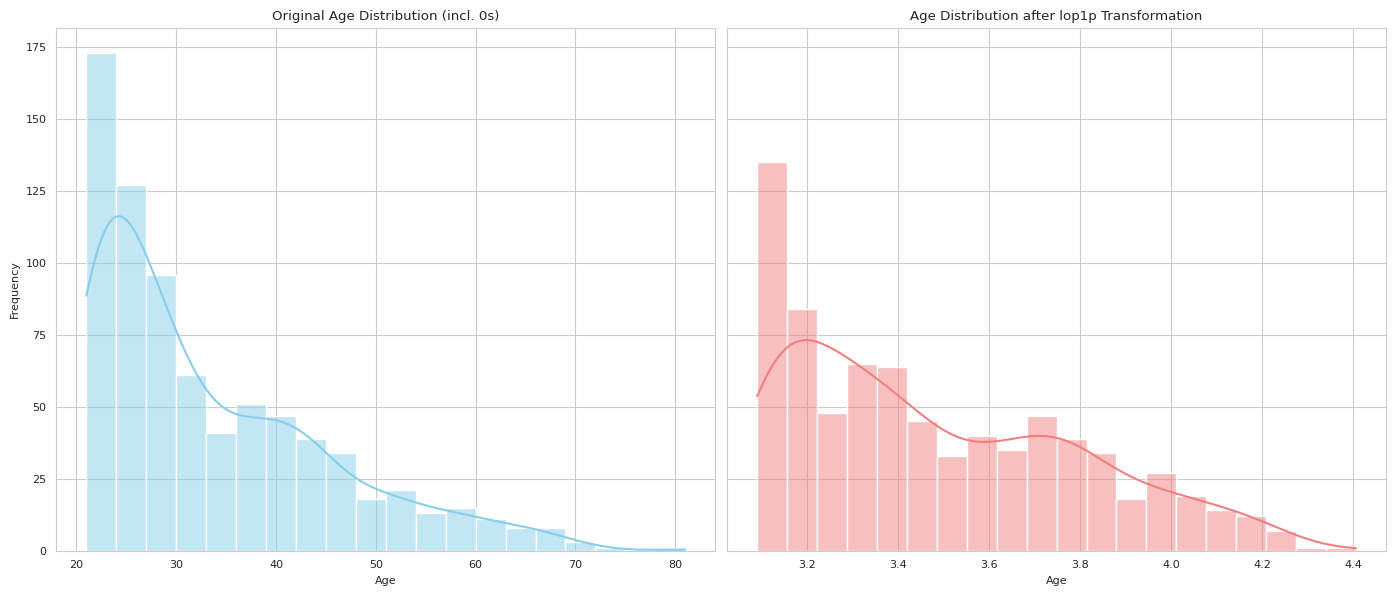

In [ ]:
transformed_data_path = '../data/processed/diabetes_transformedData.csv'
df_transformed = pd.read_csv(transformed_data_path)

print("Transformed df skewness - to check righlty skewed columns after log1p transformation")
print(df_transformed.skew())
print("Transformed df kurtosis - to check righlty skewed columns with extreme outliers after log1p transformation")
print(df_transformed.kurt())

df1 = df_org.copy()

for col in df.columns:
  if col == 'Outcome':
    continue

  fig1, axes1 = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey ensures same y-axis scale

  # Plot Original Distribution
  sns.histplot(df1[col], kde=True, ax=axes1[0], color='skyblue', bins=20)
  axes1[0].set_title(f'Original {col} Distribution (incl. 0s)')
  axes1[0].set_xlabel(col)
  axes1[0].set_ylabel('Frequency')

  # Plot Transformed Distribution
  sns.histplot(df_transformed[col], kde=True, ax=axes1[1], color='lightcoral', bins=20)
  if col in ['Insulin','DiabetesPedigreeFunction', 'Pregnancies','Age','SkinThickness','Glucose','BMI']:
    axes1[1].set_title(f'{col} Distribution after lop1p Transformation')
  else:
    axes1[1].set_title(f'No Tranformation performed')
  axes1[1].set_xlabel(col)
  axes1[1].set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()


## EDA of Scaled Dataset

Scaled df skewness - to check righlty skewed columns after Robust scaling of features
Pregnancies                -0.243478
Glucose                    -0.058322
BloodPressure               0.141885
SkinThickness              -0.859016
Insulin                    -0.175078
BMI                        -0.037722
DiabetesPedigreeFunction    1.117942
Age                         0.614664
Outcome                     0.635017
dtype: float64
Scaled df kurtosis - to check righlty skewed columns with extreme outliers after Robust scaling of features
Pregnancies                -0.947674
Glucose                    -0.168177
BloodPressure               1.098239
SkinThickness               1.789132
Insulin                     3.309865
BMI                        -0.087581
DiabetesPedigreeFunction    1.391303
Age                        -0.645917
Outcome                    -1.600930
dtype: float64


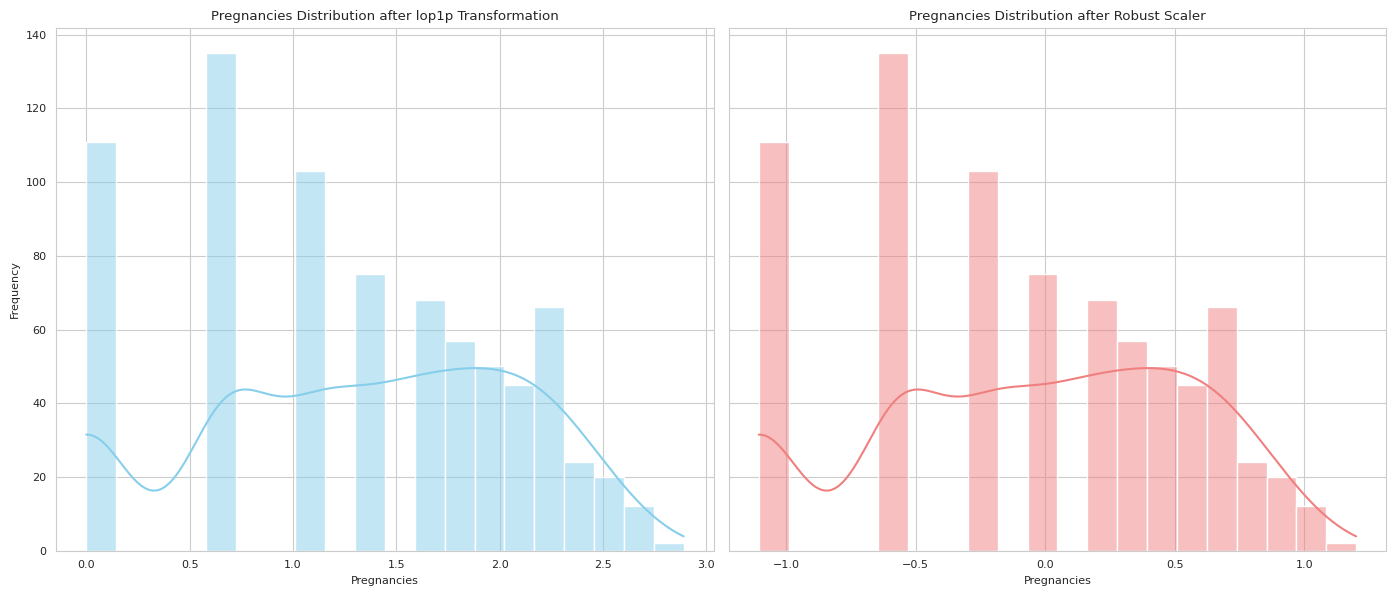

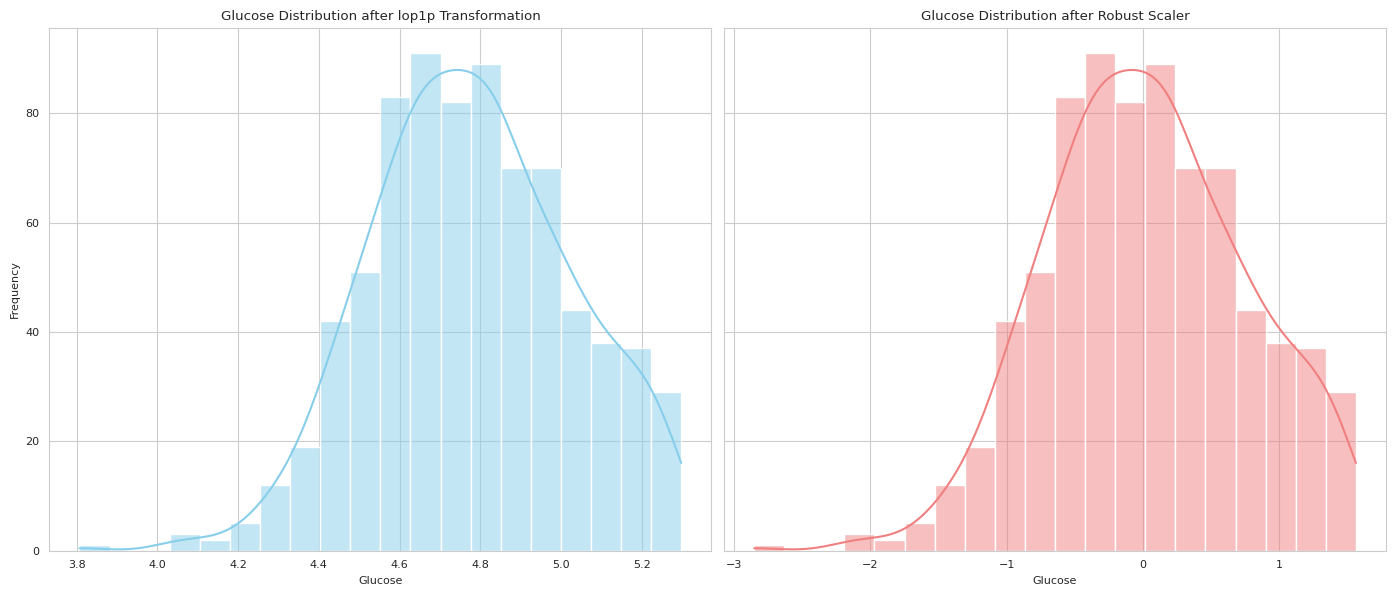

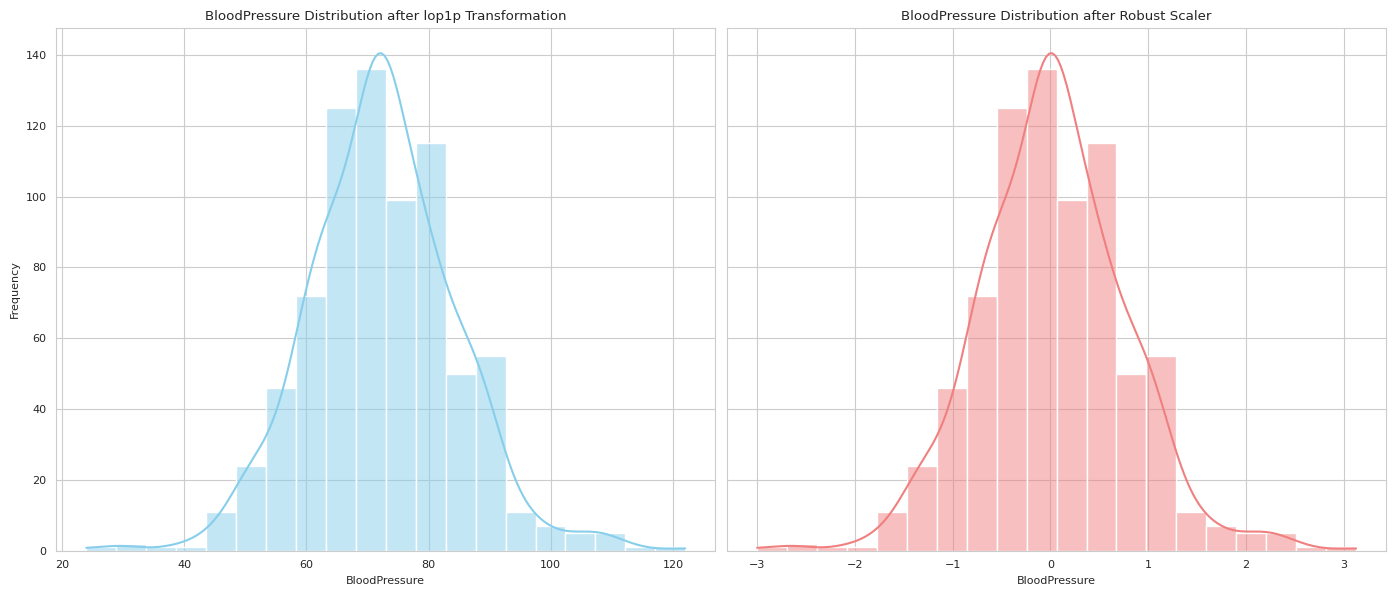

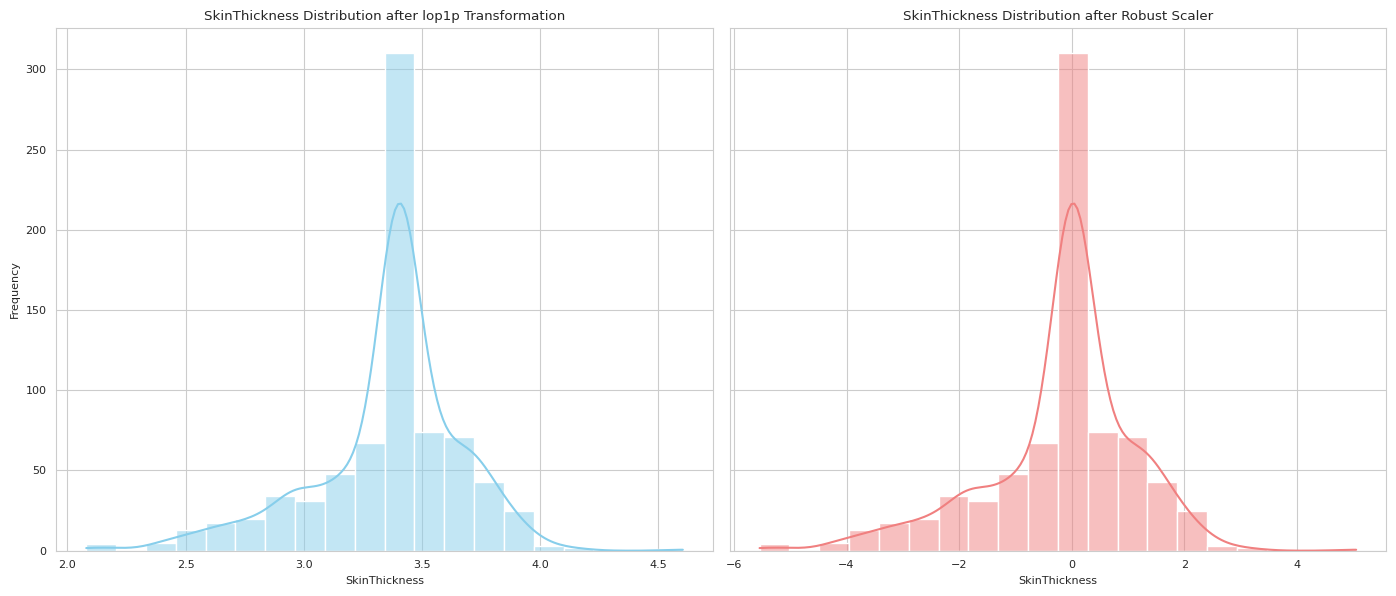

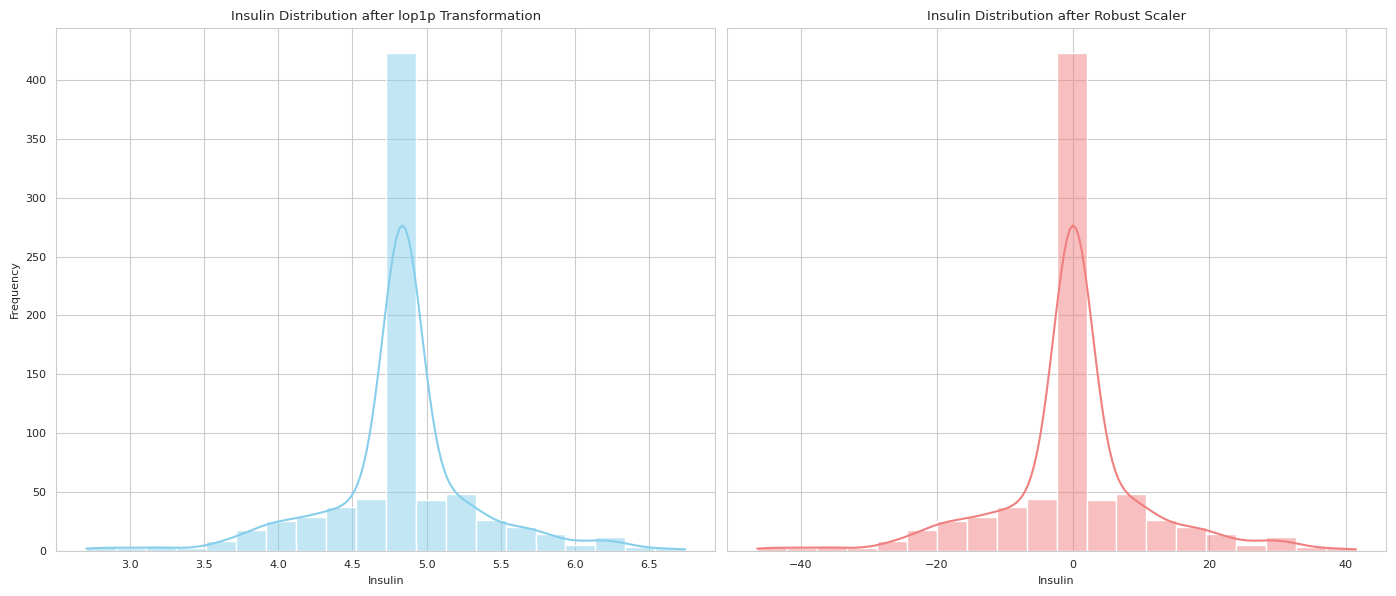

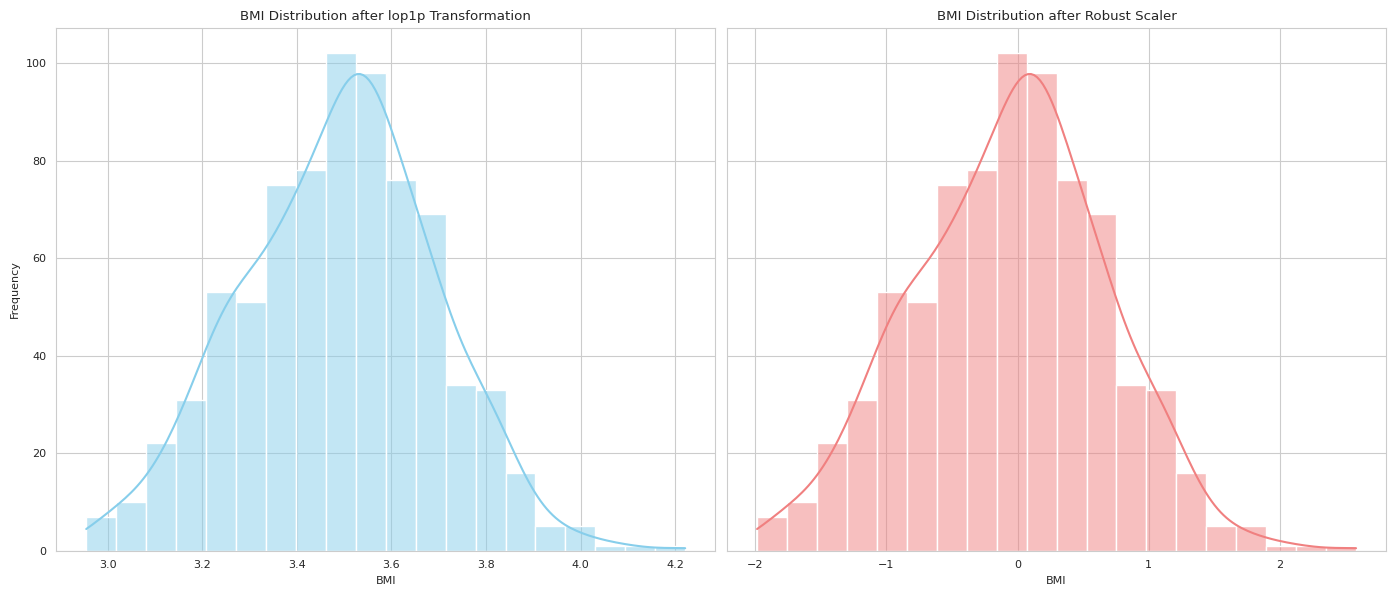

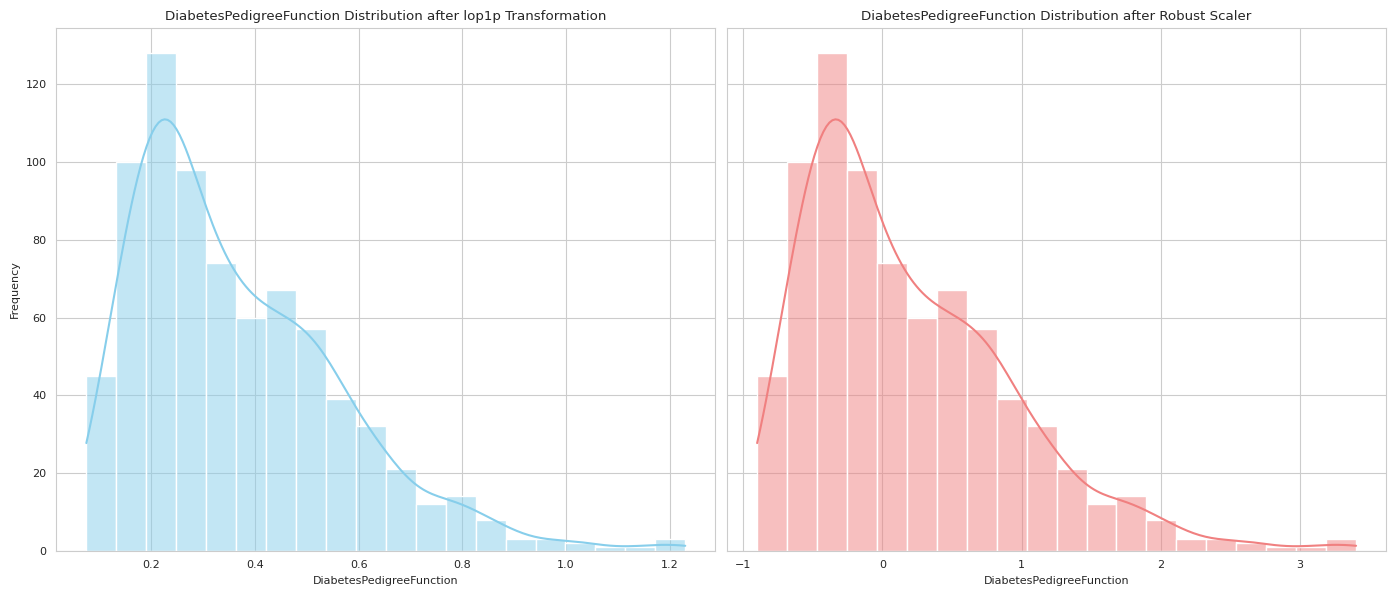

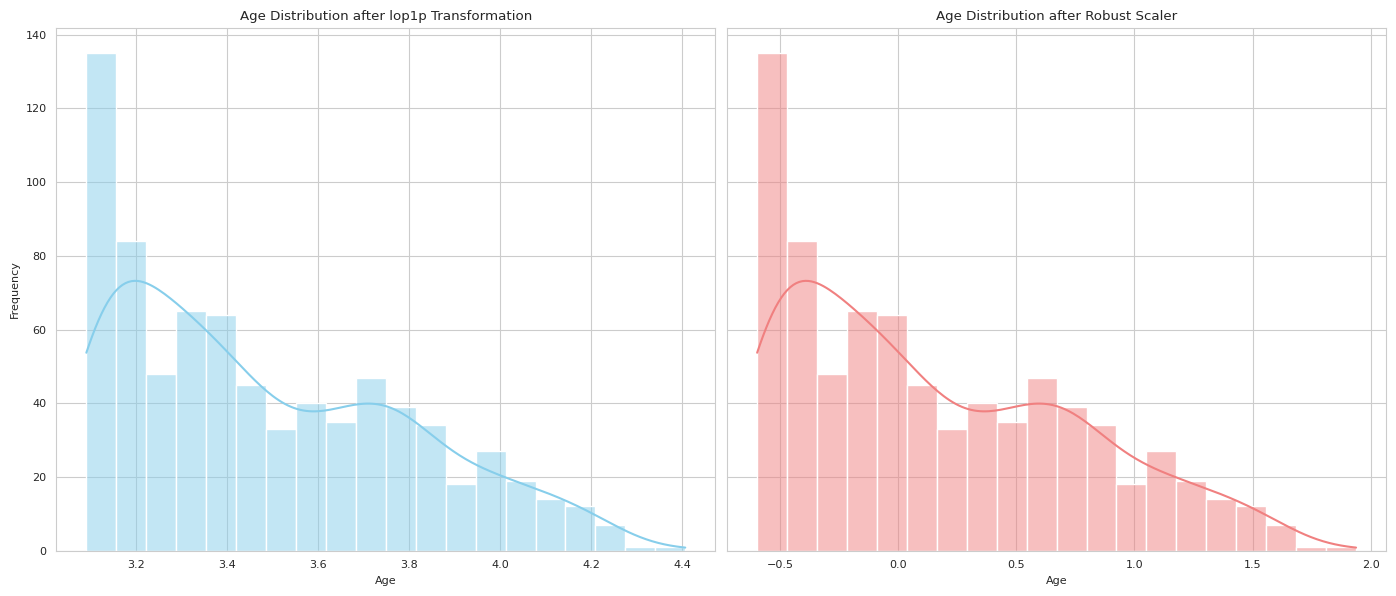

In [ ]:
scaled_data_path = '../data/processed/diabetes_preprocessedData.csv'
df_scaled = pd.read_csv(scaled_data_path)

print("Scaled df skewness - to check righlty skewed columns after Robust scaling of features")
print(df_scaled.skew())
print("Scaled df kurtosis - to check righlty skewed columns with extreme outliers after Robust scaling of features")
print(df_scaled.kurt())

df2 = df_transformed.copy()

for col in df2.columns:
  if col == 'Outcome':
    continue

  fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey ensures same y-axis scale

  # Plot Original Distribution
  sns.histplot(df2[col], kde=True, ax=axes2[0], color='skyblue', bins=20)
  axes2[0].set_title(f'{col} Distribution after lop1p Transformation')
  axes2[0].set_xlabel(col)
  axes2[0].set_ylabel('Frequency')

  # Plot Scaled Distribution
  sns.histplot(df_scaled[col], kde=True, ax=axes2[1], color='lightcoral', bins=20)
  if col not in ['Outcome']:
    axes2[1].set_title(f'{col} Distribution after Robust Scaler')
  else:
    axes2[1].set_title(f'No Scaling performed')
  axes2[1].set_xlabel(col)
  axes2[1].set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()

## Data Distribution - Raw, Imputed, Transformed and Scaled

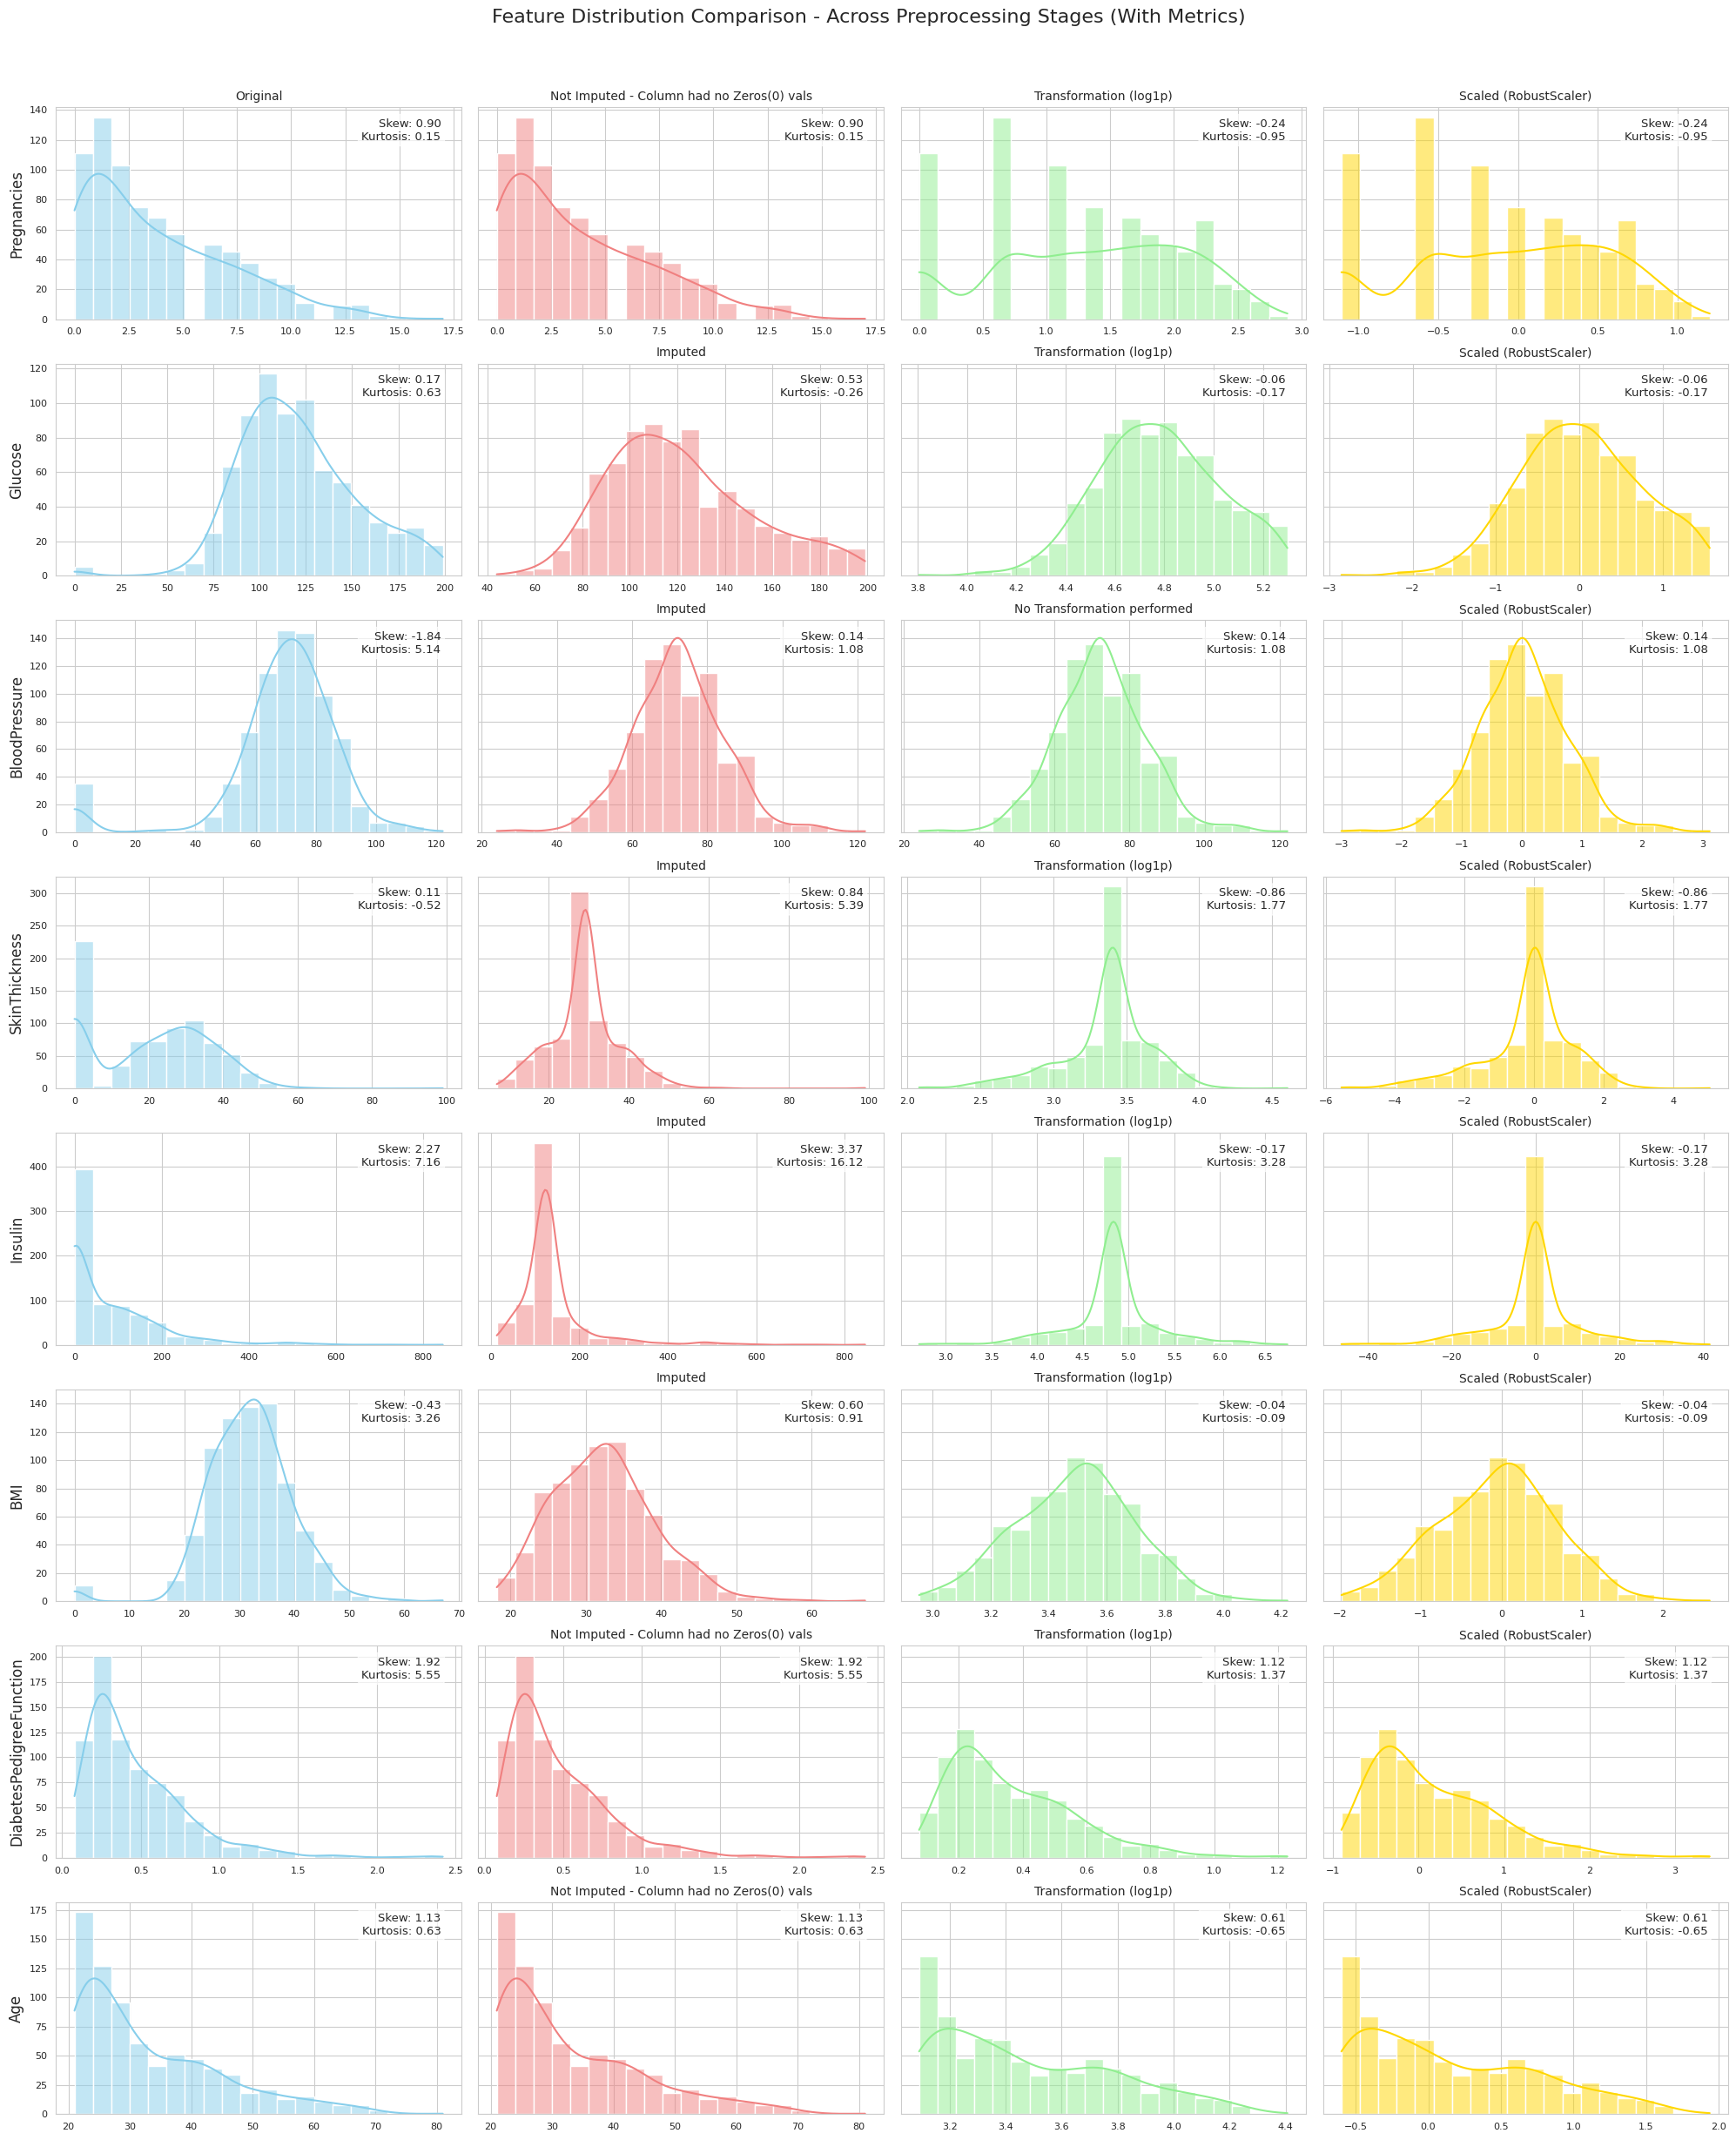

In [ ]:
# df: The original DataFrame
# imputed_df: The DataFrame after median imputation
# df_transformed: The DataFrame after log1p transformation
# df_scaled: The DataFrame after RobustScaler

# Set a style for plots
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 8

# List of columns to plot
columns_to_plot = df.columns.drop('Outcome')

# Create a single figure with a grid of subplots
# 'sharey' is set to 'row' to ensure each row (feature) has a consistent y-axis scale
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=4, figsize=(20, 25), sharey='row')

# Main title for the entire figure
fig.suptitle('Feature Distribution Comparison - Across Preprocessing Stages (With Metrics)', fontsize=16)

# List of column titles for each subplot
titles = ['Original', 'Imputed (Median)', 'Transformed (log1p)', 'Scaled (RobustScaler)']
dfs = [df, imputed_df, df_transformed, df_scaled]

# Iterate through each feature and plot its distribution
for i, col in enumerate(columns_to_plot):
    # Set the row title on the left
    axes[i, 0].set_ylabel(f'{col}', fontsize=12, rotation=90)# ha='right', va='center')

    # Iterate through each preprocessing stage
    for j in range(4):
        ax = axes[i, j]
        dfplt = dfs[j]
        color = ['skyblue', 'lightcoral', 'lightgreen', 'gold'][j]

        # Calculate skewness and kurtosis for the current data and column
        current_skew = skew(dfplt[col], nan_policy='omit')
        current_kurtosis = kurtosis(dfplt[col], nan_policy='omit')

        # Plot the histogram with KDE
        sns.histplot(dfplt[col], kde=True, ax=ax, color=color, bins=20)
        ax.set_xlabel('') # Clear the x-axis label for a cleaner look

        # Add the skewness and kurtosis values as text annotations
        ax.text(0.95, 0.95,
                f'Skew: {current_skew:.2f}\nKurtosis: {current_kurtosis:.2f}',
                transform=ax.transAxes,
                fontsize=9.5,
                ha='right',
                va='top',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

        # Set specific titles for the first row only
        if i == 0:
            ax.set_title(titles[j], fontsize=10)

        # Set specific titles and labels for each stage based on the column
        if j == 1: # Imputed
          if col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
            ax.set_title(f'Imputed', fontsize=10)
          else:
            ax.set_title(f'Not Imputed - Column had no Zeros(0) vals', fontsize=10)

        if j == 2: # Transformed
          if col in ['Insulin','DiabetesPedigreeFunction', 'Pregnancies','Age','SkinThickness','Glucose','BMI']:
            ax.set_title(f'Transformation (log1p)', fontsize=10)
          else:
            ax.set_title(f'No Transformation performed', fontsize=10)

        if j == 3: # Scaled
          ax.set_title(f'Scaled (RobustScaler)', fontsize=10)

        # Remove y-labels for all but the first column to avoid clutter
        if j > 0:
            ax.set_ylabel('')

# Clean up layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for the suptitle
plt.show()

# To save the figure
#fig.savefig('../plots/EDA_feature_distributions.png', dpi=300)
